In [52]:
# The data used in this notebook is retrieved from: Rahman, J.S., Gedeon, T., Caldwell, S. and Jones, R., 2020, July. Brain Melody Informatics: Analysing Effects of Music on Brainwave Patterns. In 2020 International Joint Conference on Neural Networks (IJCNN) (pp. 1-8). IEEE.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/comp8420-musicaffect/music-affect/music-eeg-features.xlsx
/kaggle/input/comp8420-musicaffect/music-affect/README.txt
/kaggle/input/comp8420-musicaffect/music-affect/jessica_eeg_paper.pdf
/kaggle/input/comp8420-musicaffect/music-affect/citation.txt


In [53]:
!pip install openpyxl 
!pip install xlrd==1.1.0

In [54]:
data_source = pd.read_excel('/kaggle/input/comp8420-musicaffect/music-affect/music-eeg-features.xlsx', header=1)
data_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subject no.          576 non-null    int64  
 1   mean_F7              576 non-null    float64
 2   max_F7               576 non-null    float64
 3   min_F7               576 non-null    float64
 4   std_F7               576 non-null    float64
 5   iqr_F7               576 non-null    float64
 6   var_F7               576 non-null    float64
 7   sum_F7               576 non-null    float64
 8   skw_F7               576 non-null    float64
 9   krt_F7               576 non-null    float64
 10  mean_first_diff_F7   576 non-null    float64
 11  mean_second_diff_F7  576 non-null    float64
 12  rms_F7               576 non-null    float64
 13  abssum_F7            576 non-null    float64
 14  ssi_F7               576 non-null    float64
 15  var_F7.1             576 non-null    flo

In [55]:
data_source.describe()

,subject no.,mean_F7,max_F7,min_F7,std_F7,iqr_F7,var_F7,sum_F7,skw_F7,krt_F7,...,log_F7,aac_F7,dasdv_F7,dfa_F7,fuzzy_F7,shannon_F7,pe_F7,hjorth_F7,hurst_F7,label
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,...,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,12.500000,1.819086,6.354124,0.243775,1.900527,1.902208,12.188467,24.834008,0.857294,3.136624,...,0.932747,1.083809,1.661459,1.196636,457.739062,0.938953,0.475938,0.629106,0.691681,2.000000
std,6.928203,2.570039,9.783731,0.763617,2.931105,2.934445,33.388805,37.050789,0.772770,1.626333,...,1.583103,1.645498,2.552779,1.858145,5446.766319,0.253003,0.204220,0.155269,0.286486,0.817206
min,1.000000,0.177153,0.331130,0.000036,0.058098,0.022917,0.003375,1.311274,-1.368202,1.142360,...,0.091639,0.074650,0.097195,0.007543,-0.090866,0.233792,0.000000,0.252908,0.135447,1.000000
25%,6.750000,0.489684,1.227658,0.005698,0.363696,0.514053,0.132275,6.050474,0.320250,1.840712,...,0.213298,0.220676,0.312948,0.195796,0.505415,0.688567,0.218104,0.517218,0.490965,1.000000
50%,12.500000,0.814839,2.014539,0.015316,0.580049,0.807612,0.336458,9.727701,0.773900,2.539434,...,0.411035,0.371518,0.508042,0.414471,0.907387,0.950271,0.581174,0.657355,0.603059,2.000000
75%,18.250000,1.632414,6.132998,0.230895,1.885264,1.514906,3.554224,23.708503,1.421059,4.073411,...,0.939982,0.999221,1.565938,1.224011,1.747119,1.103433,0.637285,0.727326,0.887428,3.000000
max,24.000000,21.310083,49.653301,14.591949,16.243698,22.097017,263.857719,230.562023,2.390834,7.301408,...,20.472335,10.685444,13.002317,15.121106,65535.000000,1.370502,0.724527,1.038237,1.570675,3.000000


In [56]:
# import matplotlib.pyplot as plt 

feature_list = data_source.columns.tolist()
feature_list.remove('label') 
feature_list.remove('subject no.')
# for col in feature_list:
#     plt.boxplot(x=data_source[col], vert=False, labels=[col])
#     plt.show()
for col in feature_list:
    IQR = data_source[col].quantile(.75) - data_source[col].quantile(.25)
    upper_outliers_num = data_source[col][data_source[col] > (data_source[col].quantile(.75) + 1.5 * IQR)].count()
    lower_outliers_num = data_source[col][data_source[col] < (data_source[col].quantile(.25) - 1.5 * IQR)].count()
    print("Number of outliers in", col, "is: ", upper_outliers_num + lower_outliers_num)

Number of outliers in mean_F7 is:  88
Number of outliers in max_F7 is:  83
Number of outliers in min_F7 is:  67
Number of outliers in std_F7 is:  85
Number of outliers in iqr_F7 is:  86
Number of outliers in var_F7 is:  102
Number of outliers in sum_F7 is:  77
Number of outliers in skw_F7 is:  1
Number of outliers in krt_F7 is:  0
Number of outliers in mean_first_diff_F7 is:  87
Number of outliers in mean_second_diff_F7 is:  88
Number of outliers in rms_F7 is:  88
Number of outliers in abssum_F7 is:  77
Number of outliers in ssi_F7 is:  106
Number of outliers in var_F7.1 is:  99
Number of outliers in mav_F7 is:  88
Number of outliers in log_F7 is:  59
Number of outliers in aac_F7 is:  87
Number of outliers in dasdv_F7 is:  88
Number of outliers in dfa_F7 is:  84
Number of outliers in fuzzy_F7 is:  95
Number of outliers in shannon_F7 is:  0
Number of outliers in pe_F7 is:  0
Number of outliers in hjorth_F7 is:  0
Number of outliers in hurst_F7 is:  1


In [57]:
data_source.std()

subject no.               6.928203
mean_F7                   2.570039
max_F7                    9.783731
min_F7                    0.763617
std_F7                    2.931105
iqr_F7                    2.934445
var_F7                   33.388805
sum_F7                   37.050789
skw_F7                    0.772770
krt_F7                    1.626333
mean_first_diff_F7        1.618207
mean_second_diff_F7       2.356572
rms_F7                    3.768027
abssum_F7                37.050789
ssi_F7                  820.393141
var_F7.1                 64.600919
mav_F7                    2.570039
log_F7                    1.583103
aac_F7                    1.645498
dasdv_F7                  2.552779
dfa_F7                    1.858145
fuzzy_F7               5446.766319
shannon_F7                0.253003
pe_F7                     0.204220
hjorth_F7                 0.155269
hurst_F7                  0.286486
label                     0.817206
dtype: float64

In [58]:
data_source.skew()

subject no.             0.000000
mean_F7                 2.874945
max_F7                  2.339593
min_F7                 12.535919
std_F7                  2.372759
iqr_F7                  3.089990
var_F7                  4.045615
sum_F7                  2.725090
skw_F7                  0.029088
krt_F7                  0.939747
mean_first_diff_F7      2.526946
mean_second_diff_F7     2.882766
rms_F7                  2.415462
abssum_F7               2.725090
ssi_F7                  4.024341
var_F7.1                4.459129
mav_F7                  2.874945
log_F7                  5.514621
aac_F7                  2.492809
dasdv_F7                2.287237
dfa_F7                  3.073314
fuzzy_F7               11.905649
shannon_F7             -0.034860
pe_F7                  -0.640917
hjorth_F7              -0.033445
hurst_F7                0.668152
label                   0.000000
dtype: float64

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# random split the dataset (do this among each people)
def split_among_people(data_source):
    people_num = len(data_source['subject no.'].unique())
    train_df_list = []
    test_df_list = []
    for idx in range(people_num):
        train_df, test_df = train_test_split(data_source[data_source['subject no.'] == (idx + 1)], test_size=0.3, random_state=7)
        train_df_list.append(train_df)
        test_df_list.append(test_df)
    return pd.concat(train_df_list), pd.concat(test_df_list)

def model_report(model, tar_x, tar_y):
    pred = model.predict(tar_x)
    acc = accuracy_score(tar_y, pred)
    print("accuracy: ", acc)
    cm = confusion_matrix(tar_y, pred)
    print("confusion matrix:\n",cm)

In [60]:
train_data, test_data = split_among_people(data_source)
train_y = train_data.label
train_x = train_data.drop(columns=['label', 'subject no.'])
test_y = test_data.label
test_x = test_data.drop(columns=['label', 'subject no.'])

# RandomForest baseline
randomForest = RandomForestClassifier(random_state=7)
randomForest.fit(train_x, train_y)

print("RF on training set:")
model_report(randomForest, train_x, train_y)
print("\nRF on testing set:")
model_report(randomForest, test_x, test_y)

RF on training set:
accuracy:  1.0
confusion matrix:
 [[112   0   0]
 [  0 128   0]
 [  0   0 144]]

RF on testing set:
accuracy:  0.4322916666666667
confusion matrix:
 [[27 25 28]
 [15 29 20]
 [11 10 27]]


In [61]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
feature_num = len(train_x.columns)
latent_var_dim = 32
class_num = len(train_y.unique())
batch_size = 4
epoch_num = 800
lr = .002

# a simple nn model
class BasicNNClassifier(torch.nn.Module):
    def __init__(self, feature_num, latent_var_dim, class_num, dropout=.1):
        super(BasicNNClassifier, self).__init__()
        self.input_dim = feature_num
        self.hidden_dim = latent_var_dim
        self.output_dim = class_num
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(self.input_dim, self.hidden_dim),
            torch.nn.ReLU(),
            torch.nn.Linear(self.hidden_dim, self.hidden_dim),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropout),
            torch.nn.Linear(self.hidden_dim, self.output_dim),
        )
    def forward(self, x):
        output = self.layers(x)
        return output

In [62]:
# Now: 0=classical, 1=instrumental, 2=pop
# train_yt = torch.Tensor(pd.get_dummies(train_y).values) - 1
train_yt = torch.LongTensor(train_y.values) - 1
train_xt = torch.Tensor(train_x.values)
test_yt = torch.LongTensor(test_y.values) - 1
test_xt = torch.Tensor(test_x.values)

train_dataset = TensorDataset(train_xt, train_yt)
train_sampler = RandomSampler(train_dataset)
train_loader = DataLoader(train_dataset, sampler=train_sampler, batch_size=batch_size)

basic_model = BasicNNClassifier(feature_num, latent_var_dim, class_num).to(device)

optimiser = torch.optim.Adam(basic_model.parameters(), lr=lr)
loss_func = torch.nn.CrossEntropyLoss()

basic_model.train()

BasicNNClassifier(
  (layers): Sequential(
    (0): Linear(in_features=25, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Dropout(p=0.1, inplace=False)
    (5): Linear(in_features=32, out_features=3, bias=True)
  )
)

In [63]:
for epoch in range(epoch_num):
    epoch_loss = 0
    for batch, (data, label) in enumerate(train_loader):
        data = data.to(device)
        label = label.to(device)
        pred = basic_model(data)
        loss = loss_func(pred.squeeze(), label.squeeze())
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
        epoch_loss += loss.cpu().data.numpy()
    if (epoch + 1) % 100 == 0:
        train_pred = torch.argmax(basic_model(train_xt.to(device)), dim=1)
        acc = accuracy_score(train_pred.cpu().squeeze().detach().numpy(), train_yt.squeeze().detach().numpy())
        print("Now epoch:", epoch + 1, "current loss:", epoch_loss, "train set accuracy:", acc)

Now epoch: 100 current loss: 90.02490285038948 train set accuracy: 0.5
Now epoch: 200 current loss: 77.03446833789349 train set accuracy: 0.6171875
Now epoch: 300 current loss: 68.9581187069416 train set accuracy: 0.65625
Now epoch: 400 current loss: 64.35763330757618 train set accuracy: 0.7083333333333334
Now epoch: 500 current loss: 59.51258658617735 train set accuracy: 0.75
Now epoch: 600 current loss: 68.50920137390494 train set accuracy: 0.7473958333333334
Now epoch: 700 current loss: 57.922345355153084 train set accuracy: 0.7473958333333334
Now epoch: 800 current loss: 45.8806713463855 train set accuracy: 0.7890625


In [64]:
basic_model.eval()
test_pred = torch.argmax(basic_model(test_xt.to(device)), dim=1)
fin_acc = accuracy_score(test_pred.cpu().squeeze().detach().numpy(), test_yt.squeeze().detach().numpy())
fin_acc

0.3072916666666667

In [65]:
latent_var_dim = 32
batch_size = 4
epoch_num = 800
lr = .002

class DeeperNNClassifier(torch.nn.Module):
    def __init__(self, feature_num, latent_var_dim, class_num, dropout=.1):
        super(DeeperNNClassifier, self).__init__()
        self.input_dim = feature_num
        self.hidden_dim = latent_var_dim
        self.output_dim = class_num
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(self.input_dim, self.hidden_dim),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropout),
            torch.nn.Linear(self.hidden_dim, self.hidden_dim//2),
            torch.nn.ReLU(),
            torch.nn.Linear(self.hidden_dim//2, self.hidden_dim),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropout),
            torch.nn.Linear(self.hidden_dim, self.output_dim)
        )
    def forward(self, x):
        output = self.layers(x)
        return output

In [66]:
deeper_model = DeeperNNClassifier(feature_num, latent_var_dim, class_num).to(device)
optimiser = torch.optim.Adam(deeper_model.parameters(), lr=lr)
deeper_model.train()

for epoch in range(epoch_num):
    epoch_loss = 0
    for batch, (data, label) in enumerate(train_loader):
        data = data.to(device)
        label = label.to(device)
        pred = deeper_model(data)
        loss = loss_func(pred.squeeze(), label.squeeze())
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
        epoch_loss += loss.cpu().data.numpy()
    if (epoch + 1) % 100 == 0:
        train_pred = torch.argmax(deeper_model(train_xt.to(device)), dim=1)
        acc = accuracy_score(train_pred.cpu().squeeze().detach().numpy(), train_yt.squeeze().detach().numpy())
        print("Now epoch:", epoch + 1, "current loss:", epoch_loss, "train set accuracy:", acc)

Now epoch: 100 current loss: 99.01782315969467 train set accuracy: 0.4427083333333333
Now epoch: 200 current loss: 89.42713230848312 train set accuracy: 0.5572916666666666
Now epoch: 300 current loss: 82.69496890902519 train set accuracy: 0.6041666666666666
Now epoch: 400 current loss: 76.9210142493248 train set accuracy: 0.6171875
Now epoch: 500 current loss: 77.57702323794365 train set accuracy: 0.640625
Now epoch: 600 current loss: 70.49718227237463 train set accuracy: 0.6223958333333334
Now epoch: 700 current loss: 70.31545978784561 train set accuracy: 0.6692708333333334
Now epoch: 800 current loss: 72.68914490938187 train set accuracy: 0.6510416666666666


In [67]:
deeper_model.eval()
test_pred = torch.argmax(deeper_model(test_xt.to(device)), dim=1)
fin_acc = accuracy_score(test_pred.cpu().squeeze().detach().numpy(), test_yt.squeeze().detach().numpy())
fin_acc

0.3385416666666667

In [68]:
# deal with some ridiculous outliers (only in train samples)
def norm_remove_outliers(train_df, show_ratio=False):
    norm_train_x = train_df.copy()
    normalise_dict = {}
    train_features = norm_train_x.columns
    normalise_dict['feature_list'] = train_features
    for col in train_features:
        ratio = (norm_train_x[col].max()-norm_train_x[col].quantile(.97))/(norm_train_x[col].max()-norm_train_x[col].min())
        flag = ratio > .25
        if flag:
            # deal with outliers
            IQR = norm_train_x[col].quantile(.75) - norm_train_x[col].quantile(.25)
            upper = min(norm_train_x[col].quantile(.75) + 1.5 * IQR, norm_train_x[col].max())
            lower = max(norm_train_x[col].quantile(.25) - 1.5 * IQR, norm_train_x[col].min())
            norm_train_x[col] = (norm_train_x[col] - lower) / (upper - lower)
            norm_train_x[col][norm_train_x[col] < 0] = 0
            norm_train_x[col][norm_train_x[col] > 1] = 1
        else:
            # do the simple normalise
            upper = norm_train_x[col].max()
            lower = norm_train_x[col].min()
            norm_train_x[col] = (norm_train_x[col] - lower) / (upper - lower)
        # keep the parameters we use
        normalise_dict[col + "_upper"] = upper
        normalise_dict[col + "_lower"] = lower
        if show_ratio:
            print(col, ratio, flag)
    return norm_train_x, normalise_dict

norm_train_x, normalise_dict = norm_remove_outliers(train_x, True)

mean_F7 0.587600573684096 True
max_F7 0.33221822575045706 True
min_F7 0.9017276051911405 True
std_F7 0.38954179450915727 True
iqr_F7 0.5198141333913147 True
var_F7 0.6255487399789161 True
sum_F7 0.44931092831542574 True
skw_F7 0.046924959858395794 False
krt_F7 0.08935693588640761 False
mean_first_diff_F7 0.4394863643797536 True
mean_second_diff_F7 0.4977530773093126 True
rms_F7 0.39685216505161736 True
abssum_F7 0.44931092831542574 True
ssi_F7 0.6405419443622601 True
var_F7.1 0.6492384148914431 True
mav_F7 0.587600573684096 True
log_F7 0.7316227007878546 True
aac_F7 0.478676247446412 True
dasdv_F7 0.2969239149643623 True
dfa_F7 0.6204093261879456 True
fuzzy_F7 0.999664116407571 True
shannon_F7 0.033714249946342686 False
pe_F7 0.03612359947967791 False
hjorth_F7 0.07963521952264878 False
hurst_F7 0.15327962842146023 False


In [69]:
norm_train_x.describe()

,mean_F7,max_F7,min_F7,std_F7,iqr_F7,var_F7,sum_F7,skw_F7,krt_F7,mean_first_diff_F7,...,mav_F7,log_F7,aac_F7,dasdv_F7,dfa_F7,fuzzy_F7,shannon_F7,pe_F7,hjorth_F7,hurst_F7
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,...,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,0.336504,0.306563,0.238296,0.301913,0.403639,0.261670,0.315287,0.589774,0.323357,0.312938,...,0.336504,0.316817,0.308560,0.311396,0.315896,0.367647,0.614787,0.630686,0.484858,0.382746
std,0.325871,0.349433,0.336286,0.342396,0.308063,0.389950,0.324564,0.209062,0.267521,0.336076,...,0.325871,0.317529,0.338069,0.354837,0.347904,0.330414,0.227990,0.290147,0.197035,0.212048
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.100966,0.070183,0.009026,0.073781,0.181933,0.014703,0.089072,0.446245,0.107531,0.077859,...,0.100966,0.069296,0.070031,0.067679,0.065025,0.128934,0.400080,0.301030,0.353754,0.238620
50%,0.207922,0.129223,0.024338,0.127511,0.287229,0.038740,0.166081,0.565754,0.229947,0.153518,...,0.207922,0.183206,0.146878,0.131495,0.141669,0.218570,0.630309,0.790755,0.522187,0.316119
75%,0.460580,0.442110,0.405415,0.444269,0.509160,0.408822,0.453443,0.741710,0.486059,0.446715,...,0.460580,0.441578,0.442019,0.440608,0.439015,0.477360,0.756550,0.877995,0.603199,0.518824
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
# keep the current df to take a look 
current_df = norm_train_x.copy()
current_df['label'] = train_y
current_df.to_csv('normed_train_df.csv')

In [71]:
# define the normalise pipeline for the test set
def norm_test_df(test_df):
    norm_test_df = test_df.copy()
    for col in normalise_dict['feature_list']:
        if col in norm_test_df.columns:
            norm_test_df[col] = (norm_test_df[col] - normalise_dict[col + "_lower"]) / (normalise_dict[col + "_upper"] - normalise_dict[col + "_lower"])
            norm_test_df[col][norm_test_df[col] < 0] = 0
            norm_test_df[col][norm_test_df[col] > 1] = 1
    return norm_test_df

# this one for the input samples (as vectors)
def norm_input_vec(sample):
    idx = 0
    for col in normalise_dict['feature_list']:
        sample[idx] = min(1, max(0, (sample[idx] - normalise_dict[col + "_lower"])) / (normalise_dict[col + "_upper"] - normalise_dict[col + "_lower"]))
        idx += 1
    return sample

In [72]:
feature_num = len(norm_train_x.columns)
latent_var_dim = 32
class_num = len(train_y.unique())
batch_size = 8
epoch_num = 1600
lr = .001

# Now: 0=classical, 1=instrumental, 2=pop
train_yt = torch.LongTensor(train_y.values) - 1
train_xt = torch.Tensor(norm_train_x.values)
norm_test_x = norm_test_df(test_x)
test_yt = torch.LongTensor(test_y.values) - 1
test_xt = torch.Tensor(norm_test_x.values)

train_dataset = TensorDataset(train_xt, train_yt)
train_sampler = RandomSampler(train_dataset)
train_loader = DataLoader(train_dataset, sampler=train_sampler, batch_size=batch_size)

# Better performance after removing outliers and normalisation?
deeper_model = DeeperNNClassifier(feature_num, latent_var_dim, class_num).to(device)
optimiser = torch.optim.Adam(deeper_model.parameters(), lr=lr)
loss_func = torch.nn.CrossEntropyLoss()

deeper_model.train()
for epoch in range(epoch_num):
    epoch_loss = 0
    for batch, (data, label) in enumerate(train_loader):
        data = data.to(device)
        label = label.to(device)
        pred = deeper_model(data)
        loss = loss_func(pred.squeeze(), label.squeeze())
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
        epoch_loss += loss.cpu().data.numpy()
    if (epoch + 1) % 100 == 0:
        train_pred = torch.argmax(deeper_model(train_xt.to(device)), dim=1)
        acc = accuracy_score(train_pred.cpu().squeeze().detach().numpy(), train_yt.squeeze().detach().numpy())
        print("Now epoch:", epoch + 1, "current loss:", epoch_loss, "train set accuracy:", acc)

Now epoch: 100 current loss: 45.0955405831337 train set accuracy: 0.5364583333333334
Now epoch: 200 current loss: 39.12892943620682 train set accuracy: 0.6276041666666666
Now epoch: 300 current loss: 32.73028127849102 train set accuracy: 0.7005208333333334
Now epoch: 400 current loss: 28.092902541160583 train set accuracy: 0.734375
Now epoch: 500 current loss: 27.423722073435783 train set accuracy: 0.7890625
Now epoch: 600 current loss: 22.13586027920246 train set accuracy: 0.8072916666666666
Now epoch: 700 current loss: 20.060323998332024 train set accuracy: 0.8463541666666666
Now epoch: 800 current loss: 22.35003037750721 train set accuracy: 0.8359375
Now epoch: 900 current loss: 19.260108843445778 train set accuracy: 0.8411458333333334
Now epoch: 1000 current loss: 19.143173776566982 train set accuracy: 0.8619791666666666
Now epoch: 1100 current loss: 15.252820432186127 train set accuracy: 0.8671875
Now epoch: 1200 current loss: 15.46901073306799 train set accuracy: 0.875
Now epoch:

In [73]:
normed_test_df = norm_test_x.copy()
normed_test_df['label'] = test_y
normed_test_df.to_csv('normed_test_df.csv')

In [74]:
deeper_model.eval()
test_pred = torch.argmax(deeper_model(test_xt.to(device)), dim=1)
fin_acc = accuracy_score(test_pred.cpu().squeeze().detach().numpy(), test_yt.squeeze().detach().numpy())
fin_acc

0.3177083333333333

In [75]:
# Check the correlation, we may not need all the features (Pearson)
corr_map = current_df.corr()
corr_map.label

mean_F7               -0.022965
max_F7                 0.044260
min_F7                -0.091819
std_F7                 0.024032
iqr_F7                -0.072700
var_F7                 0.034275
sum_F7                 0.041123
skw_F7                 0.152965
krt_F7                 0.218442
mean_first_diff_F7     0.012289
mean_second_diff_F7    0.015791
rms_F7                 0.009604
abssum_F7              0.041123
ssi_F7                 0.049943
var_F7.1               0.014550
mav_F7                -0.022965
log_F7                -0.075713
aac_F7                 0.016108
dasdv_F7               0.044517
dfa_F7                -0.017972
fuzzy_F7              -0.042331
shannon_F7            -0.119292
pe_F7                  0.086099
hjorth_F7              0.034260
hurst_F7               0.021555
label                  1.000000
Name: label, dtype: float64

In [76]:
high_corr_features = []
for col in corr_map:
    if abs(corr_map[col].label) > .02 and col != 'label':
        high_corr_features.append(col)
# the training features' distributions according to different labels
diff_dis_features = ['max_F7', 'min_F7', 'std_F7', 'iqr_F7', 'var_F7', 'sum_F7', 'skw_F7', 'krt_F7', 'mean_second_diff_F7',
                     'abssum_F7', 'ssi_F7', 'log_F7', 'dasdv_F7', 'aac_F7', 'shannon_F7', 'hjorth_F7', 'hurst_F7']

In [77]:
selected_features = []
for col in diff_dis_features:
    if col in high_corr_features:
        selected_features.append(col)

In [78]:
selected_features

['max_F7',
 'min_F7',
 'std_F7',
 'iqr_F7',
 'var_F7',
 'sum_F7',
 'skw_F7',
 'krt_F7',
 'abssum_F7',
 'ssi_F7',
 'log_F7',
 'dasdv_F7',
 'shannon_F7',
 'hjorth_F7',
 'hurst_F7']

In [79]:
# refine the nn model (so we can check the middle outputs)
class RefinedNNClassifier(torch.nn.Module):
    
    def __init__(self, feature_num, latent_var_dim, class_num, dropout=.1):
        super(RefinedNNClassifier, self).__init__()
        self.input_dim = feature_num
        self.hidden_dim = latent_var_dim
        self.output_dim = class_num
        self.eval_flag = False
        self.dropout = torch.nn.Dropout(dropout)
        self.activation = torch.nn.ReLU()
        self.input_layer = torch.nn.Linear(feature_num, latent_var_dim)
        self.squeeze_layer = torch.nn.Sequential(
            torch.nn.Linear(latent_var_dim, latent_var_dim//2),
            torch.nn.Linear(latent_var_dim//2, latent_var_dim)
        )
        self.output_layer = torch.nn.Linear(latent_var_dim, class_num)
        
    def turning_eval_flag(self, flag):
        self.eval_flag = flag
        
    def forward(self, x, check_flag=0):
        check_vec = None
        # the input layer
        output = self.input_layer(x)
        output = self.activation(output)
        if check_flag == 1:
            check_vec = output
        output = self.dropout(output)
        # the middle suqeeze layer
        output = self.squeeze_layer(output)
        output = self.activation(output)
        if check_flag == 2:
            check_vec = output
        # the output layer
        output = self.output_layer(output)
        if self.eval_flag:
            output = torch.nn.functional.softmax(output, dim=1)
        if check_flag != 0:
            return output, check_vec
        else:
            return output

In [80]:
# now check if the data is still that noisy
feature_num = len(selected_features)
latent_var_dim = 32
class_num = len(train_y.unique())
batch_size = 8
epoch_num = 1600
lr = .001

selected_train_x = norm_train_x[selected_features]
selected_test_x = norm_test_df(test_x)[selected_features]

# Now: 0=classical, 1=instrumental, 2=pop
train_yt = torch.LongTensor(train_y.values) - 1
train_xt = torch.Tensor(selected_train_x.values)
test_yt = torch.LongTensor(test_y.values) - 1
test_xt = torch.Tensor(selected_test_x.values)

train_dataset = TensorDataset(train_xt, train_yt)
train_sampler = RandomSampler(train_dataset)
train_loader = DataLoader(train_dataset, sampler=train_sampler, batch_size=batch_size)

# Better performance after removing outliers and normalisation?
refine_model = RefinedNNClassifier(feature_num, latent_var_dim, class_num).to(device)
optimiser = torch.optim.Adam(refine_model.parameters(), lr=lr)
loss_func = torch.nn.CrossEntropyLoss()

refine_model.train()
refine_model.turning_eval_flag(False)
for epoch in range(epoch_num):
    epoch_loss = 0
    for batch, (data, label) in enumerate(train_loader):
        data = data.to(device)
        label = label.to(device)
        pred = refine_model(data)
        loss = loss_func(pred.squeeze(), label.squeeze())
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
        epoch_loss += loss.cpu().data.numpy()
    if (epoch + 1) % 100 == 0:
        train_pred = torch.argmax(refine_model(train_xt.to(device)), dim=1)
        acc = accuracy_score(train_pred.cpu().squeeze().detach().numpy(), train_yt.squeeze().detach().numpy())
        print("Now epoch:", epoch + 1, "current loss:", epoch_loss, "train set accuracy:", acc)

Now epoch: 100 current loss: 45.802460968494415 train set accuracy: 0.4921875
Now epoch: 200 current loss: 42.08914226293564 train set accuracy: 0.5625
Now epoch: 300 current loss: 39.915780663490295 train set accuracy: 0.5989583333333334
Now epoch: 400 current loss: 35.98348733782768 train set accuracy: 0.6432291666666666
Now epoch: 500 current loss: 33.00721272826195 train set accuracy: 0.6953125
Now epoch: 600 current loss: 31.57929304242134 train set accuracy: 0.7317708333333334
Now epoch: 700 current loss: 29.230279475450516 train set accuracy: 0.7421875
Now epoch: 800 current loss: 25.542699232697487 train set accuracy: 0.7734375
Now epoch: 900 current loss: 25.25442785024643 train set accuracy: 0.8203125
Now epoch: 1000 current loss: 23.215742006897926 train set accuracy: 0.7916666666666666
Now epoch: 1100 current loss: 20.301844641566277 train set accuracy: 0.8541666666666666
Now epoch: 1200 current loss: 21.03086981922388 train set accuracy: 0.8359375
Now epoch: 1300 current l

In [81]:
refine_model.eval()
refine_model.turning_eval_flag(True)
test_pred = torch.argmax(refine_model(test_xt.to(device)), dim=1)
fin_acc = accuracy_score(test_pred.cpu().squeeze().detach().numpy(), test_yt.squeeze().detach().numpy())
fin_acc

0.3645833333333333

In [82]:
# PROGRESSIVE IMAGE COMPRESSION
test_patterns = train_xt[:10]
refine_model.to('cpu')
pred, hidden_output = refine_model(test_patterns, check_flag=1)
hidden_output = hidden_output.T
hidden_output.size()

torch.Size([32, 10])

In [83]:
def get_angle_dict(hidden_output):
    angle_dict = {}
    for idx_1 in range(hidden_output.size()[0]):
        for idx_2 in range(idx_1+1, hidden_output.size()[0]):
            dot_prod = hidden_output[idx_1].T @ hidden_output[idx_2]
            norm_len = (hidden_output[idx_1].T @ hidden_output[idx_1]).sqrt() * (hidden_output[idx_2].T @ hidden_output[idx_2]).sqrt()
            if norm_len == 0:
                continue
            angle_dict[str(idx_1+1)+str(idx_2+1)] = (torch.arccos(dot_prod / norm_len) / np.pi) * 180
    return angle_dict
angle_dict = get_angle_dict(hidden_output)

In [84]:
def get_min_suit_angle(angle_dict, report_flag=False):
    min_angle = 180
    num_good_angles = len(angle_dict)
    for item in angle_dict:
        if angle_dict[item] < min_angle:
            min_angle = angle_dict[item]
        if angle_dict[item] < 15 or angle_dict[item] > 165:
            num_good_angles -=1
    if report_flag:
        print("The minium angle:", min_angle, "\nNumber of good angles:", num_good_angles)
    suitable_units_num = int(np.sqrt(num_good_angles * 2 + .25) - .5) + 1
    return min_angle, suitable_units_num
min_angle, num_suit_angles = get_min_suit_angle(angle_dict, True)

The minium angle: tensor(0., grad_fn=<MulBackward0>) 
Number of good angles: 226


In [85]:
num_suit_angles

21

In [86]:
# Now train the models and draw the plot according to the minium angle vs. final loss / latent variable nums
lartent_var_num_list = []
min_angle_list = []
fin_loss_list = []

feature_num = len(selected_features)
class_num = len(train_y.unique())
batch_size = 8
epoch_num = 1600
lr = .001

selected_train_x = norm_train_x[selected_features]
selected_test_x = norm_test_df(test_x)[selected_features]

# Now: 0=classical, 1=instrumental, 2=pop
train_yt = torch.LongTensor(train_y.values) - 1
train_xt = torch.Tensor(selected_train_x.values)
test_yt = torch.LongTensor(test_y.values) - 1
test_xt = torch.Tensor(selected_test_x.values)

train_dataset = TensorDataset(train_xt, train_yt)
train_sampler = RandomSampler(train_dataset)
train_loader = DataLoader(train_dataset, sampler=train_sampler, batch_size=batch_size)
loss_func = torch.nn.CrossEntropyLoss()

for latent_var_dim in range(4, 34, 2):
    refine_model = RefinedNNClassifier(feature_num, latent_var_dim, class_num).to(device)
    optimiser = torch.optim.Adam(refine_model.parameters(), lr=lr)
    refine_model.train()
    refine_model.turning_eval_flag(False)
    for epoch in range(epoch_num):
        for batch, (data, label) in enumerate(train_loader):
            data = data.to(device)
            label = label.to(device)
            pred = refine_model(data)
            loss = loss_func(pred.squeeze(), label.squeeze())
            optimiser.zero_grad()
            loss.backward()
            optimiser.step()
    fin_pred, fin_hidden = refine_model(train_xt.to(device), check_flag=1)
    fin_loss = loss_func(fin_pred.squeeze(), train_yt.squeeze()).cpu().data.numpy()
    fin_angle_dict = get_angle_dict(fin_hidden.T)
    fin_min_angle, _ = get_min_suit_angle(fin_angle_dict)
    print("Now with lartent var num:", latent_var_dim, "\nCurrent min angle is:", fin_min_angle, "\nThe loss on the training set:", fin_loss)
    lartent_var_num_list.append(latent_var_dim)
    min_angle_list.append(fin_min_angle)
    fin_loss_list.append(fin_loss)

Now with lartent var num: 4 
Current min angle is: tensor(78.6367, grad_fn=<MulBackward0>) 
The loss on the training set: 1.0049015
Now with lartent var num: 6 
Current min angle is: tensor(40.7090, grad_fn=<MulBackward0>) 
The loss on the training set: 0.9930292
Now with lartent var num: 8 
Current min angle is: tensor(62.5405, grad_fn=<MulBackward0>) 
The loss on the training set: 0.88018376
Now with lartent var num: 10 
Current min angle is: tensor(34.1788, grad_fn=<MulBackward0>) 
The loss on the training set: 0.8642518
Now with lartent var num: 12 
Current min angle is: tensor(42.5126, grad_fn=<MulBackward0>) 
The loss on the training set: 0.73458225
Now with lartent var num: 14 
Current min angle is: tensor(34.0916, grad_fn=<MulBackward0>) 
The loss on the training set: 0.60326934
Now with lartent var num: 16 
Current min angle is: tensor(21.9105, grad_fn=<MulBackward0>) 
The loss on the training set: 0.6830488
Now with lartent var num: 18 
Current min angle is: tensor(37.5679, g

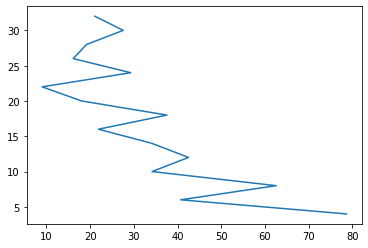

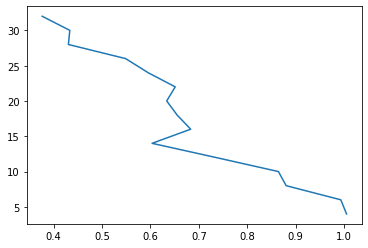

In [87]:
import matplotlib.pyplot as plt 

plt.plot(min_angle_list,lartent_var_num_list)
plt.show()
plt.plot(fin_loss_list,lartent_var_num_list)
plt.show()